## En este notebook haremos el pre-procesamiento de la data para nuestro modelo. También intentaremos hacer un poco de feature engineering

In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('data_para_preprocessing_con_gh.csv')
pd.set_option('display.max_columns',None)

In [150]:
df.head(2)

,Unnamed: 0,Antiguedad,Anunciante,Balneario,NroBanios,Nro_pisos,Cocheras,Descripcion,Direccion,Dormitorios,Estado de Inmueble,Fecha_pub,Luminosidad,Mascotas,Precio,Tipo,TipoCochera,Ubicacion,Uso_comercial,Uso_profesional,latitud,longitud,Area_constr,Area_total,Area_constr_m2,Area_total_m2,match,'Cuarto de servicio','Deposito','Terraza','Kitchenette','Sala de estar','Sotano','Patio','anx81tico','Comedor diario','Comedor','Banio de servicio','Jardanxadn Interno','Walking Closet','Escritorio','Cocina','Banio independiente','Lavanderanxada','Balcon','Sala','Closet','Banio de visitas','Agua','Guardiananxada','Internet','Luz','Cable','Servicio de Limpieza','Conexion a gas','Sistema de seguridad','Telefono','Areadeportiva','Piscina','Solarium','Sala de internet','Sala de cine','Jardanxadn','Parque interno','Guarderanxada','anx81reas verdes','Club House','Hall de ingreso','Areade BBQ','Gimnasio','Areade sauna','Juegos para ninios','Ingreso independiente','Colegios cercanos','Cerca al mar','Centros comerciales cercanos','Parques cercanos','Acceso personas discapacidad','Frente al mar','Desagaue','Jacuzzi','Chimenea','Intercomunicador','Cerco Electrico','Parrilla','Aire acondicionado','Amoblado','Sauna','Calefaccion','Equipado','Terma','Portero electrico','Cocina con reposteros',Distrito,Provincia,geohash_grado6,geohash_grado5,geohash_grado7,geohash_grado8,preciom2_area_total,preciom2_area_constr,grupo_dist,area_ponderada
0,0,5.0,Valentinoinmobiliaria,Nulo,4.0,2.0,3.0,excelente opcion para vivir en una de las mej...,"Malecon Monte Bello 5 La Molina, La Planicie, ...",3,Excelente,Publicado el 19.09.19,Muy luminoso,Si,885000.0,Casa,Paralelas,LaMolina-Lima,No,NoEspecifica,-12.077232,-76.929494,450.00 m2,600.00 m2,450.0,600.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LaMolina,Lima,6mc733,6mc73,6mc733m,6mc733mt,1971.867015,2840.748410,Es_pituco,914.155428
1,1,5.0,No disponible,Nulo,5.0,3.0,1.0,hermosa casa a espalda de futura avenida prol...,Mz. O2 Lt. 03 Urb. San Antonio De Carapongo 2 ...,5+,Excelente,Publicado el 28.08.19,Muy luminoso,Si,150000.0,Casa,NoEspecifica,Lurigancho-Lima,Si,Si,-12.005022,-76.872657,350.00 m2,183.00 m2,350.0,183.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,NoEspecifica,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lurigancho,Lima,6mc7dw,6mc7d,6mc7dwx,6mc7dwx1,865.087557,1310.324435,No_es_pituco,-166.759710


Hay columnas que no podemos usar para la predicción en sí por ahora, por eso, procederemos a deshacernos de ellas. Las columnas involucradas son: 'Unnamed:0','Unnamed:0.1','descripcion','Direccion','Fecha_pub','Ubicacion','SinNombre','Area_constr','Area_total','match'

In [151]:
cols_to_drop = ['Unnamed: 0','Descripcion','Direccion','Fecha_pub','Ubicacion','Area_constr','Area_total','match']
df.drop(cols_to_drop,axis=1,inplace=True)

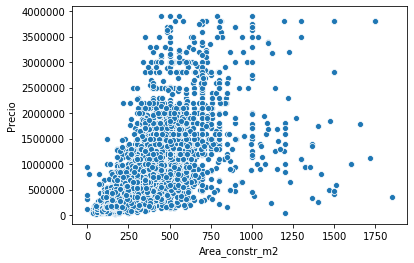

In [152]:
sns.scatterplot(y='Precio',x='Area_constr_m2',data=df)

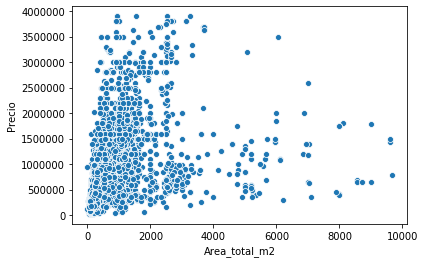

In [153]:
sns.scatterplot(y='Precio',x='Area_total_m2',data=df)

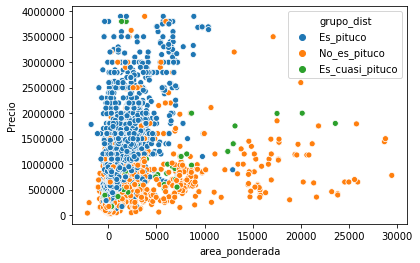

In [154]:
sns.scatterplot(y='Precio',x='area_ponderada',data=df,hue='grupo_dist')

Ahora, como sabemos, tenemos data numérica y categórica. Proceremos a separar este tipo de data y hacer el encoding.

In [155]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

##### Análisis exploratorio de las variables numéricas

In [156]:
df.drop(df[df.Area_total_m2 == 'NoEspecifica'].index,axis=0,inplace=True)

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


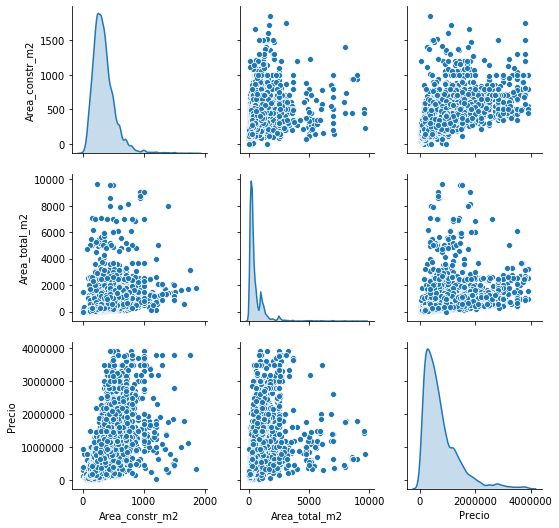

In [157]:
pairplot_cols = ['Area_constr_m2','Area_total_m2','Precio']
sns.pairplot(df, x_vars = pairplot_cols, y_vars = pairplot_cols, diag_kind = 'kde')

In [158]:
#sns.jointplot(data= df, x = 'Area_constr_m2', y = 'latitud',kind='kde')

### Anotaciones:

Ahora que tenemos nuestra data relativamente lista para el modelo, podemos agregar variables a nuestro modelo. Antes de hacer esto cabe destacar que **ya hemos hecho el feature_importance pero con un modelo de Arboles de decisión.** Con esto hemos tenido algunas sorpresas, como: 

- La variable Nro_pisos no es tan importante como para predecir el precio de la casa...

- El Geohash de grado 8 es el más preciso para explicar el precio... 

- Luego sigue el area construida y el area total, incluyendo Distrito y la variable latitud de por sí...

Entonces, nos podemos preguntar: 

- ¿Podemos agregar más data que nos ayude a mejorar nuestro modelo? 

- ¿Qué tal si medimos distancias a lugares que creemos importantes para el precio de las casas?

- ¿El modelo mejoraría si eliminamos las variables más importantes, y si reducimos dimensiones?

- ¿Qué pasaría si clusterizamos nuestra data numérica? 

- ¿Podemos sacar logaritmos si la distibución es la correcta? 


## Haremos nuestro primer modelo:

**Características**: LigthGBM

In [159]:
target = 'preciom2_area_total'

### Encodeado rápido

In [160]:
categorical = [col for col in df.columns if df[col].dtype=='object']

In [170]:
train['probability'] = 0 

C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [171]:
features = [x for x in train.columns if x not in ['Precio','preciom2_area_total','preciom2_area_constr','probability']]

In [172]:
cat_ind = [features.index(x) for x in categorical]

In [173]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col]) 

In [174]:

df.index = range(0,7572)
train = df.loc[:5400,:]
test = df.loc[5401:,:]

In [175]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

kf_previo=StratifiedKFold(n_splits=5,random_state=7642)

i=1

r=[]

importancias=pd.DataFrame()

importancias['variables'] = features

### Modelo rápido

In [176]:
from sklearn.metrics import mean_absolute_error

In [177]:
for train_index,test_index in kf_previo.split(train,train['Precio']):

    lgb_train = lgb.Dataset(train.loc[train_index,features],train.loc[train_index,target])
    lgb_eval = lgb.Dataset(train.loc[test_index,features],train.loc[test_index,target], reference=lgb_train)

    params = {'task': 'train','boosting_type': 'gbdt','objective': 'regression','metric': {'mae'},
              'learning_rate': 0.05,"min_child_samples": 100,'feature_fraction': 0.95,"bagging_freq":1,
              'bagging_fraction': 0.9,"lambda_l1":5,"lambda_l2":1,'verbose': 1}


    lgbm3 = lgb.train(params,lgb_train,num_boost_round=30000,valid_sets=lgb_eval,categorical_feature=cat_ind,
                      early_stopping_rounds=150,verbose_eval=25)

    importancia=lgbm3.feature_importance(importance_type="gain")

    
    print ("Fold_"+str(i))
    
    
    train.loc[test_index,"probability"]=lgbm3.predict(train.loc[test_index,features],
                                                      num_iteration=lgbm3.best_iteration)

    
    a= (mean_absolute_error(train.loc[test_index,target],train.loc[test_index,"probability"]))
    
    test["TARGET_FOLD_"+str(i)]=lgbm3.predict(test[features].values, num_iteration=lgbm3.best_iteration)

    importancias['gain_'+str(i)]=lgbm3.feature_importance(importance_type="gain")
    
    r.append(a)
    
    
    print (a)
    print ("")
    
    i=i+1
    

print ("mean: "+str(np.mean(np.array(r))))
print ("std: "+str(np.std(np.array(r))))


C:\Users\pablo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\pablo\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\pablo\Anaconda3\lib\site-packages\lightgbm\basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature 

Training until validation scores don't improve for 150 rounds.
[25]	valid_0's l1: 144.085
[50]	valid_0's l1: 58.9307
[75]	valid_0's l1: 47.3303
[100]	valid_0's l1: 43.4325
[125]	valid_0's l1: 41.6803
[150]	valid_0's l1: 40.5239
[175]	valid_0's l1: 38.7044
[200]	valid_0's l1: 37.4219
[225]	valid_0's l1: 36.5941
[250]	valid_0's l1: 35.7721
[275]	valid_0's l1: 34.9758
[300]	valid_0's l1: 33.9974
[325]	valid_0's l1: 33.7416
[350]	valid_0's l1: 32.9844
[375]	valid_0's l1: 32.4982
[400]	valid_0's l1: 31.8653
[425]	valid_0's l1: 31.3713
[450]	valid_0's l1: 31.034
[475]	valid_0's l1: 30.8408
[500]	valid_0's l1: 30.5816
[525]	valid_0's l1: 30.5119
[550]	valid_0's l1: 30.4955
[575]	valid_0's l1: 30.2664
[600]	valid_0's l1: 30.0416
[625]	valid_0's l1: 30.0159
[650]	valid_0's l1: 29.9706
[675]	valid_0's l1: 29.9563
[700]	valid_0's l1: 29.9074
[725]	valid_0's l1: 29.7452
[750]	valid_0's l1: 29.7256
[775]	valid_0's l1: 29.7386
[800]	valid_0's l1: 29.7959
[825]	valid_0's l1: 29.7023
[850]	valid_0's l

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



29.614805774705076

Training until validation scores don't improve for 150 rounds.
[25]	valid_0's l1: 161.252
[50]	valid_0's l1: 70.7053
[75]	valid_0's l1: 55.5112
[100]	valid_0's l1: 50.9857
[125]	valid_0's l1: 48.377
[150]	valid_0's l1: 46.9865
[175]	valid_0's l1: 45.1204
[200]	valid_0's l1: 43.7437
[225]	valid_0's l1: 42.7855
[250]	valid_0's l1: 41.4988
[275]	valid_0's l1: 40.4145
[300]	valid_0's l1: 39.5651
[325]	valid_0's l1: 38.7282
[350]	valid_0's l1: 37.8039
[375]	valid_0's l1: 37.0886
[400]	valid_0's l1: 36.7649
[425]	valid_0's l1: 36.2298
[450]	valid_0's l1: 35.6628
[475]	valid_0's l1: 35.1047
[500]	valid_0's l1: 34.7997
[525]	valid_0's l1: 34.541
[550]	valid_0's l1: 34.4359
[575]	valid_0's l1: 34.1332
[600]	valid_0's l1: 33.9462
[625]	valid_0's l1: 33.7024
[650]	valid_0's l1: 33.4224
[675]	valid_0's l1: 33.2504
[700]	valid_0's l1: 33.1229
[725]	valid_0's l1: 32.9454
[750]	valid_0's l1: 32.8045
[775]	valid_0's l1: 32.6722
[800]	valid_0's l1: 32.5963
[825]	valid_0's l1: 32.501

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pablo\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 

31.922336610636453

Training until validation scores don't improve for 150 rounds.
[25]	valid_0's l1: 133.107
[50]	valid_0's l1: 56.3804
[75]	valid_0's l1: 45.5575
[100]	valid_0's l1: 42.702
[125]	valid_0's l1: 41.9835
[150]	valid_0's l1: 41.2011
[175]	valid_0's l1: 40.1932
[200]	valid_0's l1: 40.1281
[225]	valid_0's l1: 39.2437
[250]	valid_0's l1: 38.7429
[275]	valid_0's l1: 38.2748
[300]	valid_0's l1: 37.733
[325]	valid_0's l1: 37.2377
[350]	valid_0's l1: 37.0504
[375]	valid_0's l1: 36.8855
[400]	valid_0's l1: 36.6998
[425]	valid_0's l1: 36.6313
[450]	valid_0's l1: 36.2648
[475]	valid_0's l1: 36.0114
[500]	valid_0's l1: 35.9159
[525]	valid_0's l1: 35.7714
[550]	valid_0's l1: 35.6602
[575]	valid_0's l1: 35.6635
[600]	valid_0's l1: 35.7057
[625]	valid_0's l1: 35.81
[650]	valid_0's l1: 35.7026
[675]	valid_0's l1: 35.6083
[700]	valid_0's l1: 35.666
[725]	valid_0's l1: 35.6056
[750]	valid_0's l1: 35.6697
[775]	valid_0's l1: 35.643
[800]	valid_0's l1: 35.7122
[825]	valid_0's l1: 35.7002
[8

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pablo\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 

35.56360267921061

Training until validation scores don't improve for 150 rounds.
[25]	valid_0's l1: 146.208
[50]	valid_0's l1: 64.784
[75]	valid_0's l1: 52.3895
[100]	valid_0's l1: 48.5533
[125]	valid_0's l1: 46.4246
[150]	valid_0's l1: 44.8303
[175]	valid_0's l1: 43.9428
[200]	valid_0's l1: 43.1591
[225]	valid_0's l1: 42.126
[250]	valid_0's l1: 41.4086
[275]	valid_0's l1: 40.4246
[300]	valid_0's l1: 39.6109
[325]	valid_0's l1: 39.2037
[350]	valid_0's l1: 38.8779
[375]	valid_0's l1: 38.6128
[400]	valid_0's l1: 38.2237
[425]	valid_0's l1: 37.947
[450]	valid_0's l1: 37.841
[475]	valid_0's l1: 37.694
[500]	valid_0's l1: 37.3183
[525]	valid_0's l1: 37.1479
[550]	valid_0's l1: 36.953
[575]	valid_0's l1: 36.6803
[600]	valid_0's l1: 36.5788
[625]	valid_0's l1: 36.4754
[650]	valid_0's l1: 36.3138
[675]	valid_0's l1: 36.2745
[700]	valid_0's l1: 36.3028
[725]	valid_0's l1: 36.3392
[750]	valid_0's l1: 36.42
[775]	valid_0's l1: 36.3506
[800]	valid_0's l1: 36.3677
[825]	valid_0's l1: 36.4267
Early

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\pablo\Anaconda3\lib\site-packages\lightgbm\basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 

36.24900526166927

Training until validation scores don't improve for 150 rounds.
[25]	valid_0's l1: 156.749
[50]	valid_0's l1: 85.9892
[75]	valid_0's l1: 73.203
[100]	valid_0's l1: 68.3644
[125]	valid_0's l1: 66.192
[150]	valid_0's l1: 63.6627
[175]	valid_0's l1: 62.5365
[200]	valid_0's l1: 61.77
[225]	valid_0's l1: 60.3544
[250]	valid_0's l1: 59.4564
[275]	valid_0's l1: 58.958
[300]	valid_0's l1: 58.4867
[325]	valid_0's l1: 57.7217
[350]	valid_0's l1: 57.2481
[375]	valid_0's l1: 56.7419
[400]	valid_0's l1: 56.5035
[425]	valid_0's l1: 56.18
[450]	valid_0's l1: 55.849
[475]	valid_0's l1: 55.7798
[500]	valid_0's l1: 55.5372
[525]	valid_0's l1: 55.6594
[550]	valid_0's l1: 55.5839
[575]	valid_0's l1: 55.4141
[600]	valid_0's l1: 55.2382
[625]	valid_0's l1: 55.1203
[650]	valid_0's l1: 55.0182
[675]	valid_0's l1: 55.0284
[700]	valid_0's l1: 54.8631
[725]	valid_0's l1: 54.7992
[750]	valid_0's l1: 54.7798
[775]	valid_0's l1: 54.7277
[800]	valid_0's l1: 54.7817
[825]	valid_0's l1: 54.8282
[850]

C:\Users\pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


54.60457819544112

mean: 37.5908657043325
std: 8.84450735358169


C:\Users\pablo\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [179]:
importancias2 = importancias

#### Resultados con Precio normal como variable objetivo (sin randomizacion de features) y sin variable de area_ponderada.

mean: 175170.89053437277  std: 13024.529787054174   **EROR BASELINE**

#### Resultados con preciom2_area_total, con ksplits en base a la variable Precio:

mean: 37.5908657043325   std: 8.84450735358169   **ERROR BASELINE**







In [180]:
pd.set_option('display.max_rows',500)
importancias2['total_gain'] = (importancias2.gain_1 + importancias2.gain_2 + importancias2.gain_3 + importancias2.gain_4 + importancias2.gain_5)/5
importancias2.sort_values(ascending=False,by='total_gain')

,variables,gain_1,gain_2,gain_3,gain_4,gain_5,total_gain
84,Distrito,1.286358e+10,1.401479e+10,1.543737e+10,1.527733e+10,1.573152e+10,1.466492e+10
87,geohash_grado5,6.906625e+08,4.859563e+08,6.690606e+08,5.712044e+08,5.449698e+08,5.923707e+08
14,latitud,2.806056e+08,3.100555e+08,3.698394e+08,3.916148e+08,4.082093e+08,3.520649e+08
15,longitud,2.249428e+08,2.969672e+08,3.450136e+08,2.902510e+08,3.017764e+08,2.917902e+08
91,area_ponderada,2.223965e+08,1.317361e+08,1.223533e+08,1.655533e+08,7.941371e+07,1.442906e+08
85,Provincia,6.767638e+07,6.064566e+07,6.154666e+07,7.265792e+07,4.427979e+07,6.136128e+07
17,Area_total_m2,6.069424e+07,4.463033e+07,7.877559e+07,3.613364e+07,5.423264e+07,5.489329e+07
10,Tipo,5.549927e+07,3.328535e+07,2.576853e+07,3.005237e+07,7.085891e+07,4.309288e+07
90,grupo_dist,3.568627e+07,3.831407e+07,1.920883e+07,1.860380e+07,2.941816e+07,2.824622e+07
86,geohash_grado6,4.483557e+06,6.041843e+06,5.158965e+07,2.526109e+07,2.616974e+07,2.270917e+07


Antiguedad           1.0
Anunciante         475.0
Balneario           80.0
NroBanios            4.0
Nro_pisos            3.0
                   ...  
Provincia           12.0
geohash_grado6     733.0
geohash_grado5     104.0
geohash_grado7    2725.0
geohash_grado8    3664.0
Name: 4350, Length: 91, dtype: float64

En este caso usaremos una función encontrada en Kaggle. Personalmente, he buscado varias opciones para hacer el target encoding pero este kernel es el que nos da de manera más completa el output. También, he optado por elegir el método smooth del target encoding, es decir, usar el método de forma que no caiga en tanto riesgo de overfitting. Esto tiene varias variantes pero por ahora usaré el smooth (que le da peso a la media total del target) 

- Fuente Kaggle: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

- Fuente teórica: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [4]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

Usaremos las funciones importadas, pero esto requiere que hagamos un train y test antes poder invocar a la función. 

In [5]:
X = df.drop('Precio',axis=1)
Y = df['Precio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y) #Acá dividimos la data

train = df.loc[X_train.index]
test = df.loc[X_test.index]

In [9]:
#Aplicando la función para el target_encode para todas las columnas que quiera. 
trn, sub = target_encode(train['Distrito'],
                         test['Distrito'],
                         target = train.Precio,
                         min_samples_leaf = 10,
                         smoothing = 5,
                         noise_level=0.01)

In [10]:
for obj_col in object_cols:
    temp_trn, temp_sub = target_encode(train[obj_col],
                                       test[obj_col],
                                       target = train.Precio,
                                       min_samples_leaf = 10,
                                       smoothing = 5,
                                       noise_level = 0.01)
    train[obj_col] = temp_trn
    test[obj_col] = temp_sub

In [11]:
X_train = train.drop('Precio',axis=1)
X_test = test.drop('Precio',axis=1)
y_train = train.Precio
y_test = test.Precio

### Ahora que ya hice mi encoding armaremos un pequeño modelo.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
params = {'n_estimators' : [250], 'criterion' : ['mse','mae','friedman_mse']}

In [21]:
rf_r_2= RandomForestRegressor(n_jobs=-1,n_estimators=300,criterion='mse')

rf_r_2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
rf_r.score(X_test,y_test) #Criterio default, 100 estimadores

-0.0008012913764894325

In [22]:
rf_r_2.score(X_test,y_test) #crit default, 300 estimadores

-0.0007462795188106774

In [14]:
dt_r.score(X_test,y_test) #Arbol de decision

0.26287317153278933

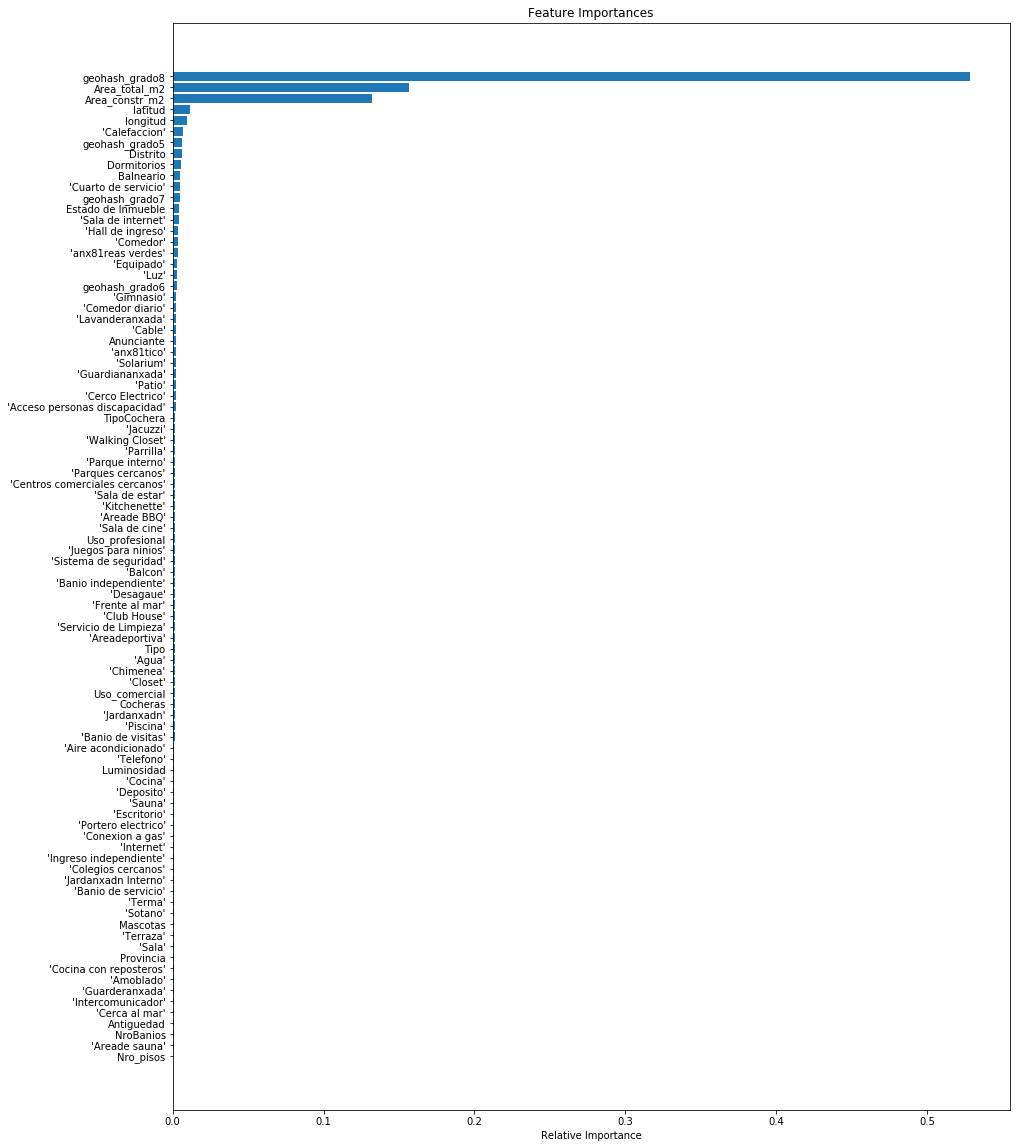

In [18]:
importances = rf_r.feature_importances_
cols = X_train.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

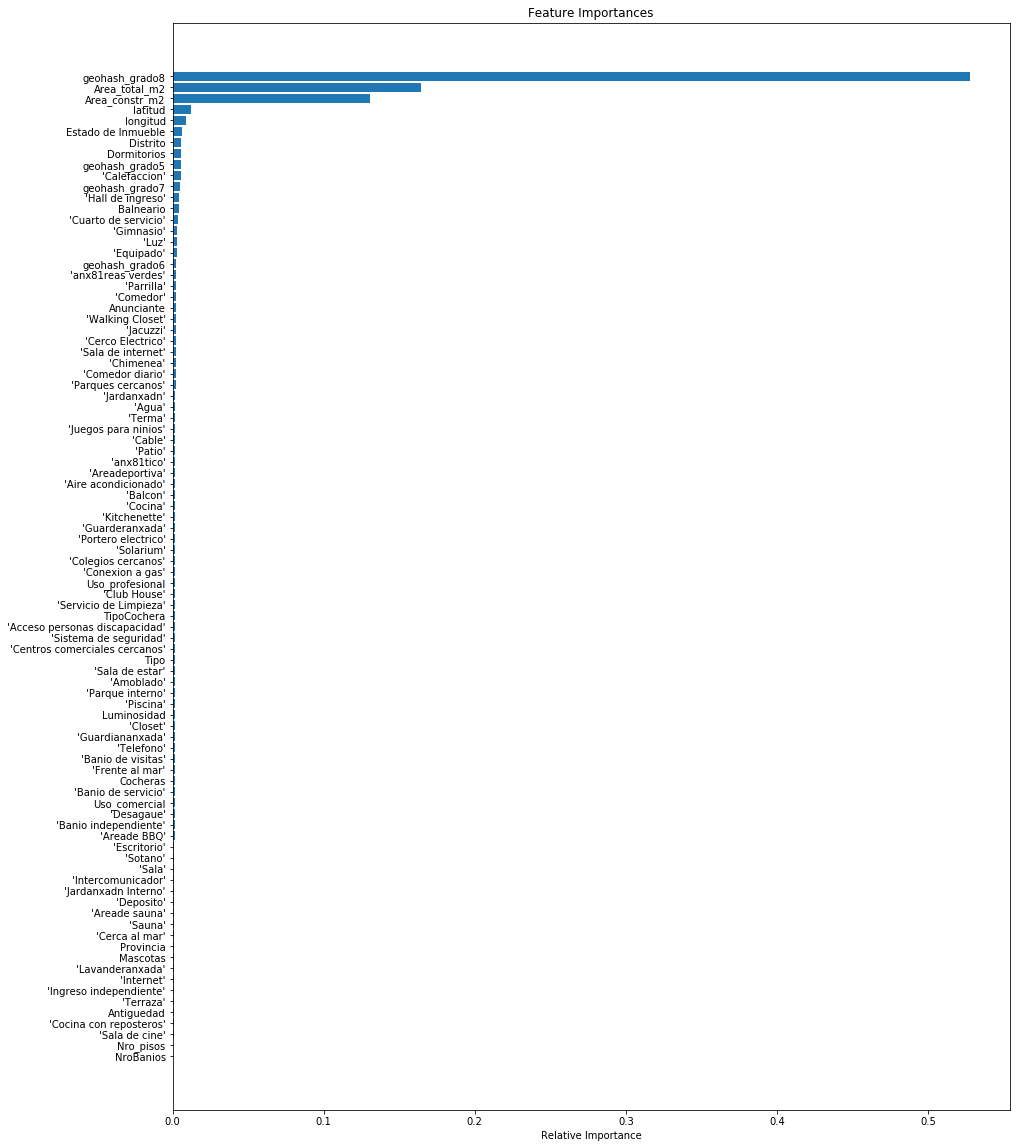

In [23]:
importances = rf_r_2.feature_importances_
cols = X_train.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
X_train_2 = X_train.drop(['longitud','latitud'],axis=1)
rf_r_2.fit(X_train_2,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
X_test_2 = X_test.drop(['longitud','latitud'],axis=1)
rf_r_2.score(X_test_2,y_test)

-0.0007825206973923748

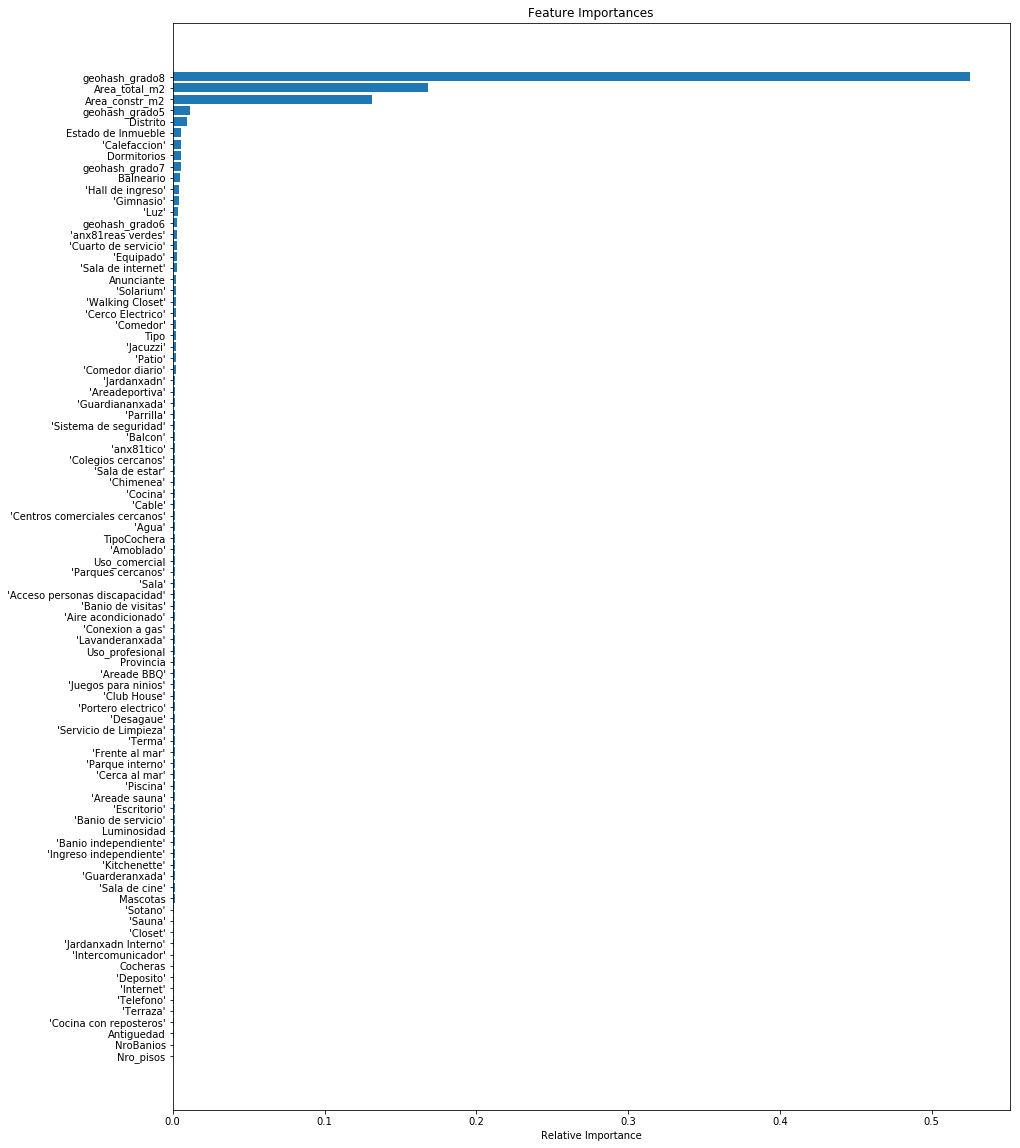

In [28]:
importances = rf_r_2.feature_importances_
cols = X_train_2.columns
plt.figure(figsize=(15,20))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)),[cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Veremos ahora la matriz de correlación de nuestra data:

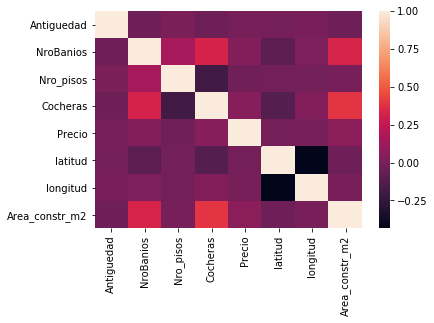

In [6]:
data_corr = df.corr()
sns.heatmap(data_corr)